In [8]:
%reload_kedro --env intel

[04/26/24 16:46:08] INFO     Resolved project path as:                                              ]8;id=405508;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=46153;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/ipython/__init__.py#146\146]8;;\
                             /home/jamontanac/Documents/AdversarialExamples/adversarialexamples.                   
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro project AdversarialExamples                                      ]8;id=332152;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=535570;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/ipython/__init__.py#115\115]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=403849;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=212081;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/ipython/__init__.py#116\116]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=646579;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=554286;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/ipython/__init__.py#122\122]8;;\

In [9]:
catalog.list("params:Report_params")


[
    'params:Report_params',
    'params:Report_params.mean',
    'params:Report_params.std',
    'params:Report_params.Top_k',
    'params:Report_params.Classes_names'
]

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
import seaborn as sns
import torch
import torchvision
import torchvision.transforms as transforms

In [13]:
catalog.list("params:Report")


[
    'params:Report_params',
    'params:Report_params.mean',
    'params:Report_params.std',
    'params:Report_params.Top_k',
    'params:Report_params.Classes_names'
]

[04/26/24 16:46:24] INFO     Loading data from params:Report_params.Classes_names               ]8;id=772417;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=893245;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py#482\482]8;;\
                             (MemoryDataset)...                                                                    

                    INFO     Loading data from Resnet_model_Adversarial_DeepFool@Dataset        ]8;id=288847;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=311498;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py#482\482]8;;\
                             (PytorchDatasetDict)...                                                               

DeepFool


                    WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1]   ]8;id=250907;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/matplotlib/image.py\image.py]8;;\:]8;id=493677;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/matplotlib/image.py#701\701]8;;\
                             for floats or [0..255] for integers).                                                 

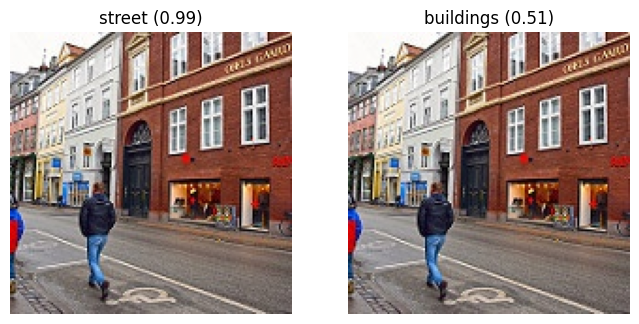

                    INFO     Loading data from Regnet_x_model_Adversarial_DeepFool@Dataset      ]8;id=565065;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=280569;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py#482\482]8;;\
                             (PytorchDatasetDict)...                                                               

DeepFool


[04/26/24 16:46:25] WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1]   ]8;id=505873;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/matplotlib/image.py\image.py]8;;\:]8;id=555550;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/matplotlib/image.py#701\701]8;;\
                             for floats or [0..255] for integers).                                                 

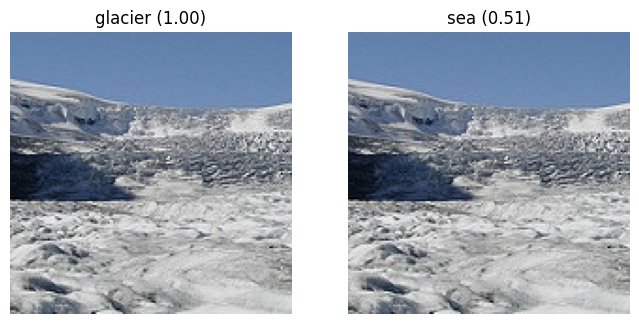

                    INFO     Loading data from Regnet_y_model_Adversarial_DeepFool@Dataset      ]8;id=682530;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=580444;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py#482\482]8;;\
                             (PytorchDatasetDict)...                                                               

DeepFool


                    WARNING  Clipping input data to the valid range for imshow with RGB data ([0..1]   ]8;id=835578;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/matplotlib/image.py\image.py]8;;\:]8;id=492306;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/matplotlib/image.py#701\701]8;;\
                             for floats or [0..255] for integers).                                                 

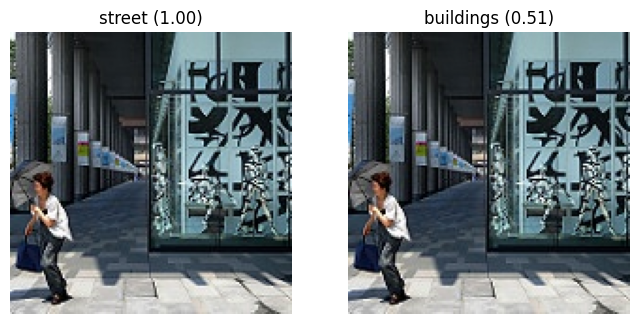

In [14]:
# attacks = ["DeepFool", "CarliniL2", "FSGM", "PGD"]
attacks = ["DeepFool"]
models = ['Resnet','Regnet_x','Regnet_y']
number = int(input('Write a number'))
classes  = catalog.load('params:Report_params.Classes_names')
for model, attack in it.product(models, attacks):
    adver = catalog.load(f'{model}_model_Adversarial_{attack}@Dataset')
    # title = str(f"Model: {model} \n Real label: {classes[adver['real_labels'][number]]} \n" + 
    #             f"Model Prediction: {classes[adver['model_labels'][number]]} ({adver['confidence'][number]:.2f}) \n" +
    #             f"Adversarial Prediction: {classes[adver['adversarial_labels'][number]]} ({adver['adversarial_confidence'][number]:.2f})")
    print(f'{attack}')
    fig, ax = plt.subplots(1, 2, figsize = (8,6))
    ax[0].imshow(adver['original'][number].numpy().transpose((1,2,0)))
    ax[0].set_title(f"{classes[adver['model_labels'][number]]} ({adver['confidence'][number]:.2f})")
    ax[0].axis('off')
    ax[1].imshow(adver['examples'][number].numpy().transpose((1,2,0)))
    ax[1].set_title(f"{classes[adver['adversarial_labels'][number]]} ({adver['adversarial_confidence'][number]:.2f})")
    ax[1].axis('off')
    # plt.suptitle(title)
    plt.show()

In [25]:

import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import matplotlib.figure as matplt
import numpy as np
import torch
import torchvision.transforms as transforms
from typing import Tuple, Dict, List
import pandas as pd
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import itertools
import torch.backends.cudnn as cudnn

import torch.optim as optim
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from src.adversarialexamples.pipelines.defenses.tranformation_defense import JPEGTransform, FlipTransform, ResizePadTransform, DistortTransform, ResizePadFlipTransform
import logging
import warnings
warnings.filterwarnings("ignore")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        

class AdversarialDataset(Dataset):
    def __init__(self, data_dict, transform=None):
        """
        Args:
            data_dict (dict): Dictionary containing adversarial data.
            transform (callable, optional): Optional transform to be applied on the examples.
        """
        self.data_dict = data_dict
        self.transform = transform

    def __len__(self):
        return len(self.data_dict["real_labels"])

    def __getitem__(self, idx):
        sample = {key: value[idx] for key, value in self.data_dict.items()}
        if self.transform:
            sample["examples"] = self.transform(sample["examples"])
        return sample




def init_model(model:torch.nn.Module,lr:float=0.001)->Tuple[nn.Module,nn.Module,optim.Optimizer]:
    # Move model to GPU if available
    model = model.to(device)
    if device == 'cuda':
        model= torch.nn.DataParallel(model)
        cudnn.benchmark = True
    return model


def General_defense_transform(adversarial_data: Dict, transformations:List, params_data: Dict,batch_size:int = 512) -> torch.utils.data.DataLoader:
    """
    This function applies a general transformation to the adversarial examples
    """
    transform = transforms.Compose([
        *transformations,
        #transforms.Normalize(mean=params_data["mean"], std=params_data["std"])
    ])
    dataset = AdversarialDataset(adversarial_data, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return loader

In [26]:
data_params


{
    'mean': [0.4301, 0.4574, 0.4538],
    'std': [0.2694, 0.2679, 0.2983],
    'Top_k': 2,
    'Classes_names': ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
}

In [57]:

adver = catalog.load(f'{model}_model_Adversarial_{attack}@Dataset')
# transformations = [ResizePadFlipTransform(ratio=0.9,axis=2)]
# transformations = [DistortTransform(d=20,delta=2)]
transformations = [JPEGTransform(quality=80)]
data_params = catalog.load("params:Report_params")
# data_loader = General_defense_transform(adversarial_data,transformations,data_params)
data_loader = General_defense_transform(adver,transformations,data_params)

img = next(iter(data_loader))

[04/26/24 18:54:31] INFO     Loading data from Regnet_y_model_Adversarial_DeepFool@Dataset      ]8;id=764359;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=747538;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py#482\482]8;;\
                             (PytorchDatasetDict)...                                                               

[04/26/24 18:54:32] INFO     Loading data from params:Report_params (MemoryDataset)...          ]8;id=840365;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=978884;file:///home/jamontanac/miniconda3/envs/AdvExamples/lib/python3.10/site-packages/kedro/io/data_catalog.py#482\482]8;;\

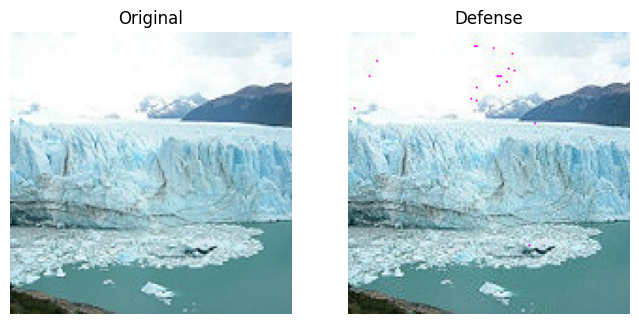

In [63]:
number = 17
fig, ax = plt.subplots(1, 2, figsize = (8,6))
ax[0].imshow(img['original'][number].numpy().transpose((1,2,0)))
ax[0].set_title(f"Original")
ax[0].axis('off')

ax[1].imshow(img['examples'][number].numpy().transpose((1,2,0)))
ax[1].set_title(f"Defense")
ax[1].axis('off')
plt.show()